In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import torch
from torch import tensor

df = pd.read_csv('titanic.csv')
modes = df.mode().iloc[0]

In [2]:
def proc_data(df):
    df['Fare'] = df.Fare.fillna(0)
    df.fillna(modes, inplace=True)
    df['LogFare'] = np.log1p(df['Fare'])
    df['Embarked'] = pd.Categorical(df.Embarked)
    df['Sex'] = pd.Categorical(df.Sex)

proc_data(df)

In [3]:
cats=["Sex","Embarked"]
conts=['Age', 'SibSp', 'Parch', 'LogFare',"Pclass"]
dep="Survived" # dependent variable ?

In [4]:
df.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: category
Categories (2, object): ['female', 'male']

In [5]:
df.Sex.cat.codes.head()


0    1
1    0
2    0
3    0
4    1
dtype: int8

### OneR classifier
The goal is find a good binary split so that it is good predictor of the target. e.g sex is a good split for survivor rate in titanic dataset. This is a good **baseline** starting point to compare more sophisticated models.

Decision tree is a series of binary decision trees so that and the end we have strong prediction of the target



In [6]:
df = pd.read_csv('titanic.csv')
modes = df.mode().iloc[0]

In [7]:
def proc_data(df):
    df['Fare'] = df.Fare.fillna(0)
    df.fillna(modes, inplace=True)
    df['LogFare'] = np.log1p(df['Fare'])
    df['Embarked'] = pd.Categorical(df.Embarked)
    df['Sex'] = pd.Categorical(df.Sex)

proc_data(df)

In [8]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from numpy import random
from sklearn.model_selection import train_test_split

random.seed(42)
trn_df,val_df = train_test_split(df, test_size=0.25)
trn_df[cats] = trn_df[cats].apply(lambda x: x.cat.codes)
val_df[cats] = val_df[cats].apply(lambda x: x.cat.codes)
def xs_y(df):
    xs = df[cats+conts].copy()
    return xs,df[dep] if dep in df else None

trn_xs,trn_y = xs_y(trn_df)
val_xs,val_y = xs_y(val_df)

m = DecisionTreeClassifier(max_leaf_nodes=4).fit(trn_xs, trn_y);

In [9]:
import graphviz
import re
def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

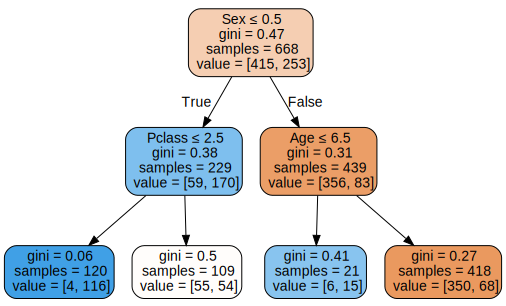

In [10]:
draw_tree(m, trn_xs, size=10)


## Bagging

Average of prediction from several models. (which is getting closer to zero )

If we randomly split our dataset into two set and build a decision tree from it, it becomes a random forest. 

## Feature importanc

The Gini index (or impurity) is a value computed by the decision tree. It is derived by subtracting the total of the squared probabilities of each class from one and multiplying the result by 100. It corresponds to the likelihood that the target would be categorized wrongly when a random sample is chosen. The smaller is the value, the more confident is the prediction.

We can look at the gini and find out what are important variables

Random forst are also good at explaining what columns are improtatn and why a decision is made. 

